# **1. Perkenalan Dataset**


Dataset yang digunakan dalam proyek ini adalah data **Crop Recommendation** yang berisi informasi tentang parameter tanah dan cuaca yang beserta rekomendasi tanaman yang sesuai.

**Sumber Dataset**: [Kaggle](https://www.kaggle.com/datasets/madhuraatmarambhagat/crop-recommendation-dataset/data)


# **2. Import Library**

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

In [73]:
df = pd.read_csv('./../crop_data_raw.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# **4. Exploratory Data Analysis (EDA)**

## 4.1 Informasi Umum Dataset

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [75]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [76]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [77]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [78]:
df.duplicated().sum()

np.int64(0)

Dataset ini terdiri dari 8 kolom dan 22000 baris. Kolom-kolom tersebut adalah sebagai berikut:
- `N`: Nitrogen dalam tanah (mg/kg)
- `P`: Fosfor dalam tanah (mg/kg)
- `K`: Potasium dalam tanah (mg/kg)
- `temperature`: Rata-rata suhu tanah (°C)
- `humidity`: Rata-rata kelembapan relatif (%)
- `ph`: pH tanah
- `rainfall`: Curah hujan (mm)
- `label`: Tanaman yang cocok ditanam pada kondisi tersebut. Terdiri dari: 'rice', 'maize','chickpea', 'kidneybeans', 'pigeonpeas',
'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
'orange', 'papaya', 'coconut', 'cotton', 'jute', dan 'coffee'.

Tidak ditemukan missing value maupun duplikasi pada dataset ini.

## 4.2 Distribusi

### 4.2.1 Distribusi Kelas Target

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


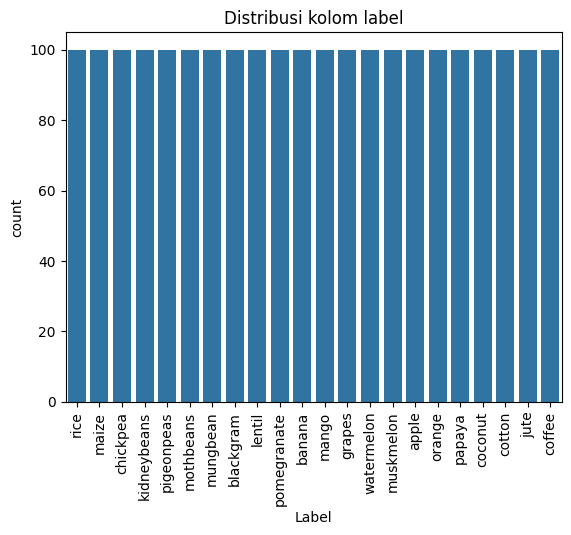

In [79]:
print(df['label'].value_counts())
sns.countplot(x='label', data=df)
plt.title('Distribusi kolom label')
plt.xticks(rotation=90)
plt.xlabel('Label')
plt.show()

### 4.2.2 Distribusi Fitur

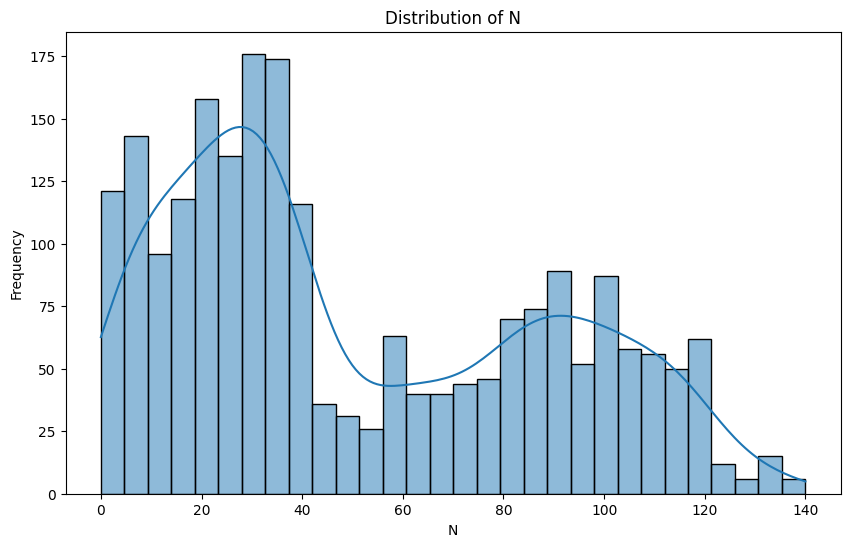

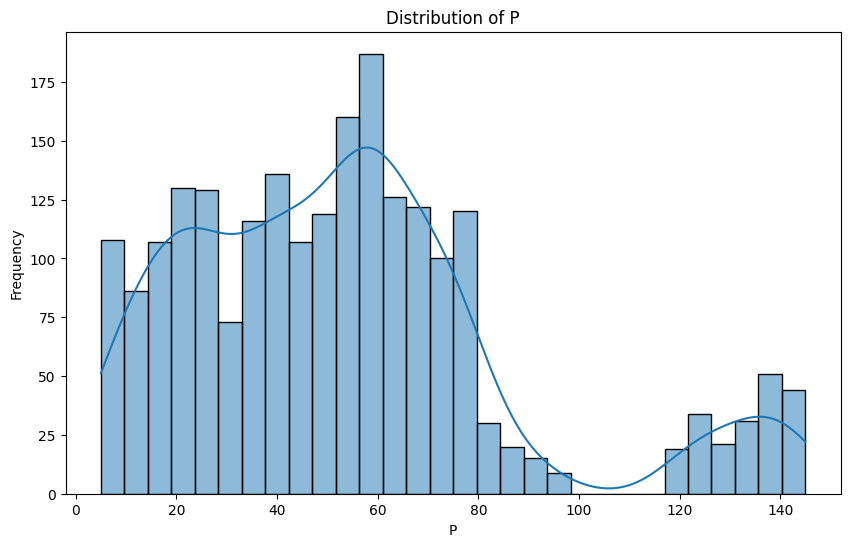

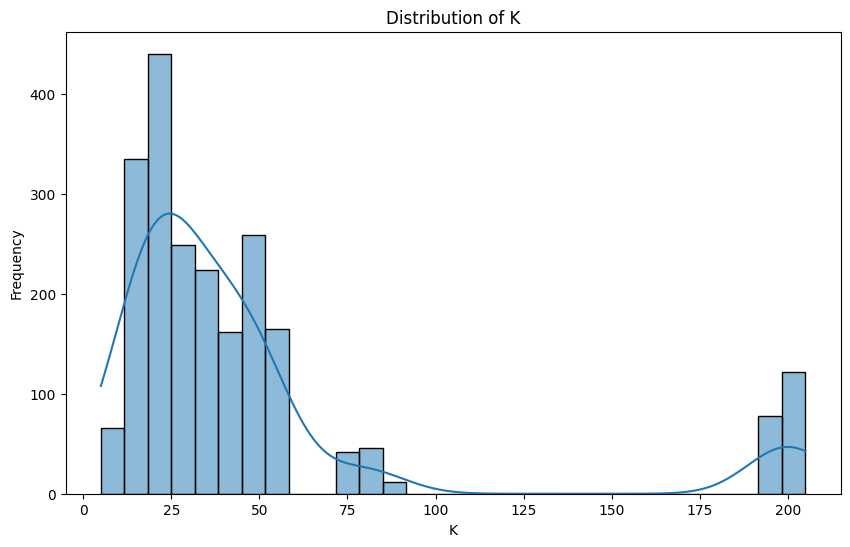

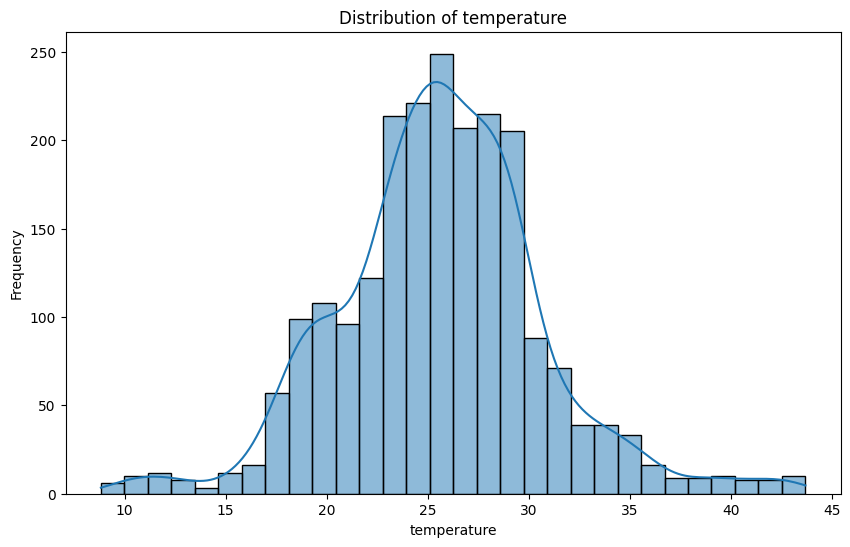

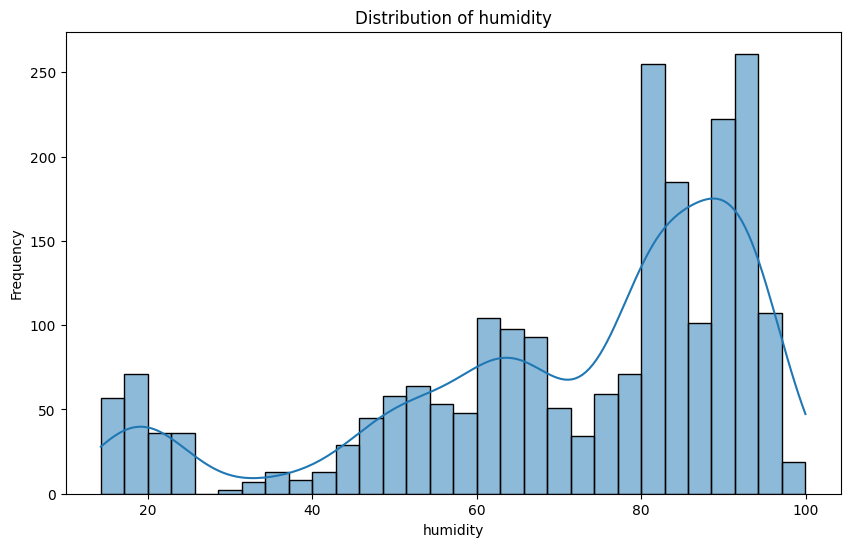

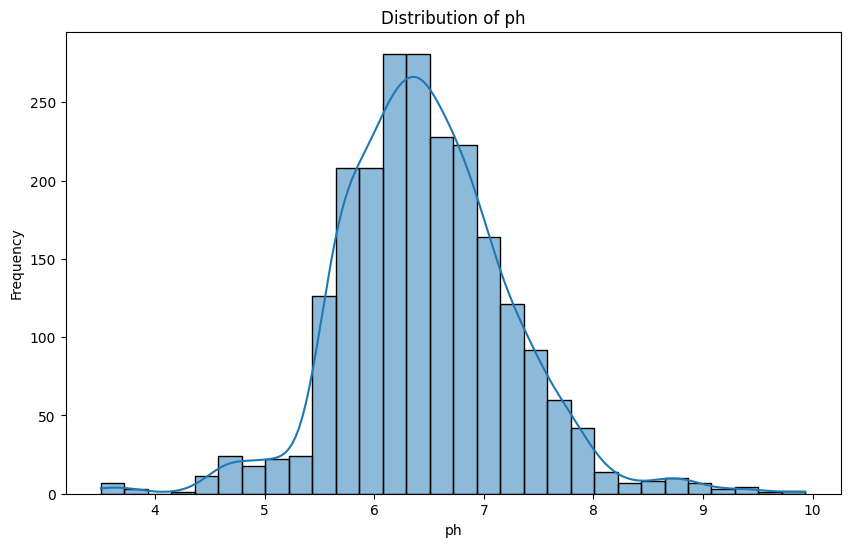

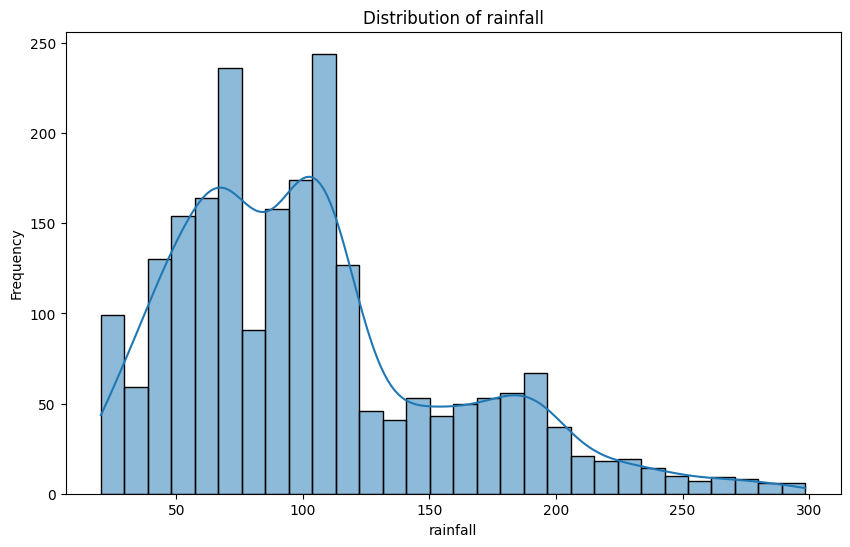

In [80]:
features = df.columns[:-1]  # Exclude the label
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

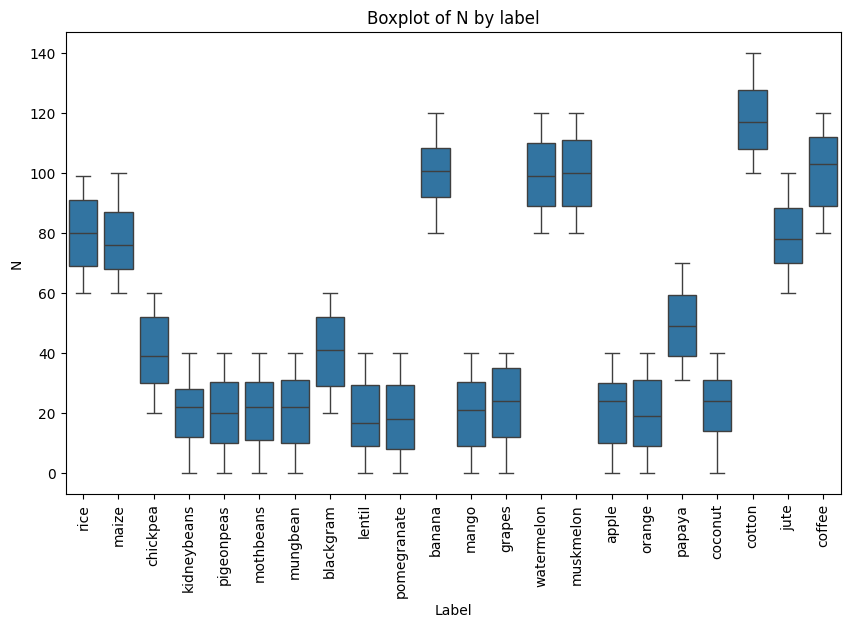

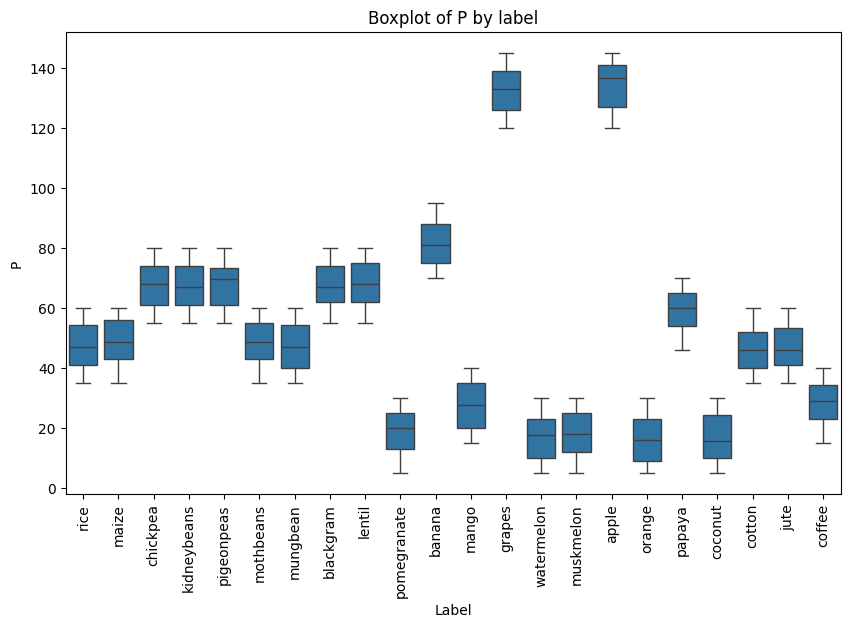

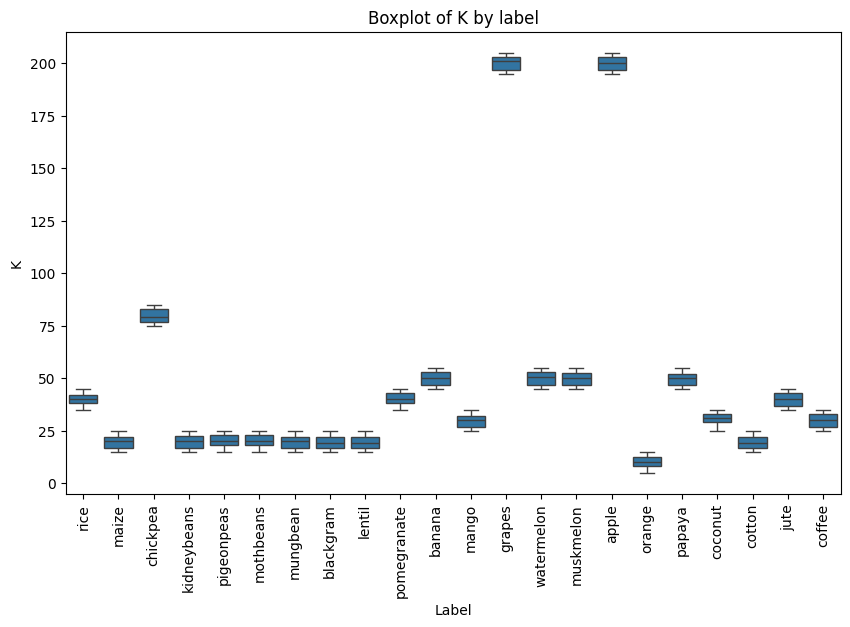

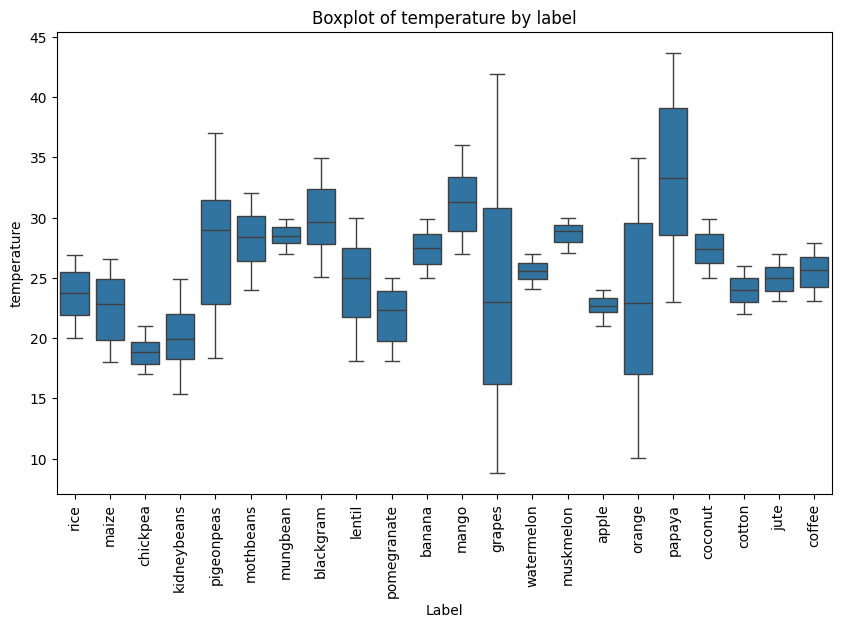

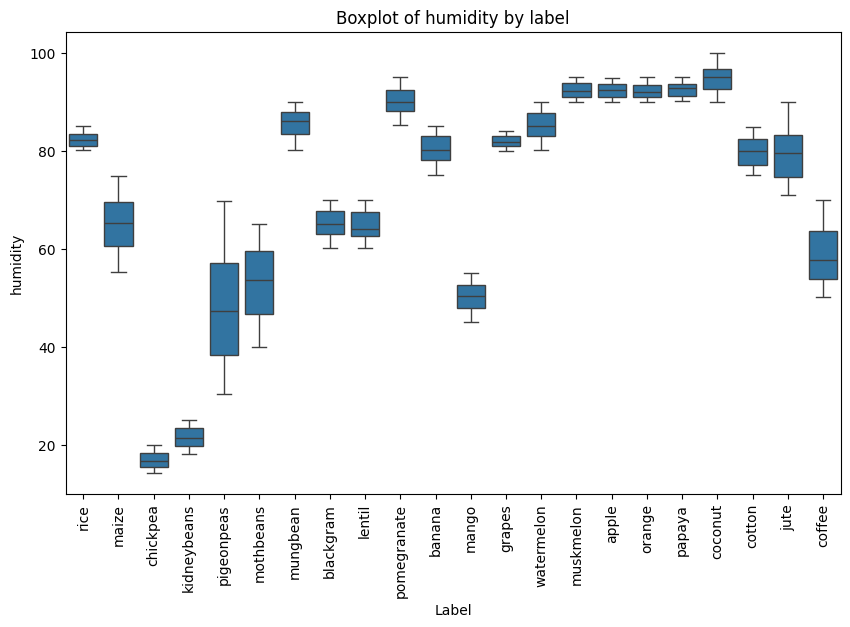

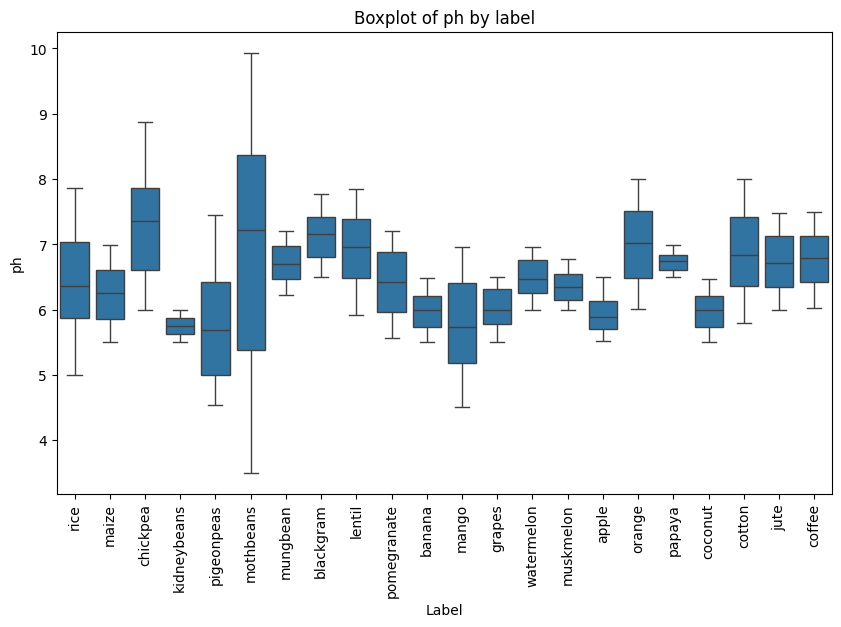

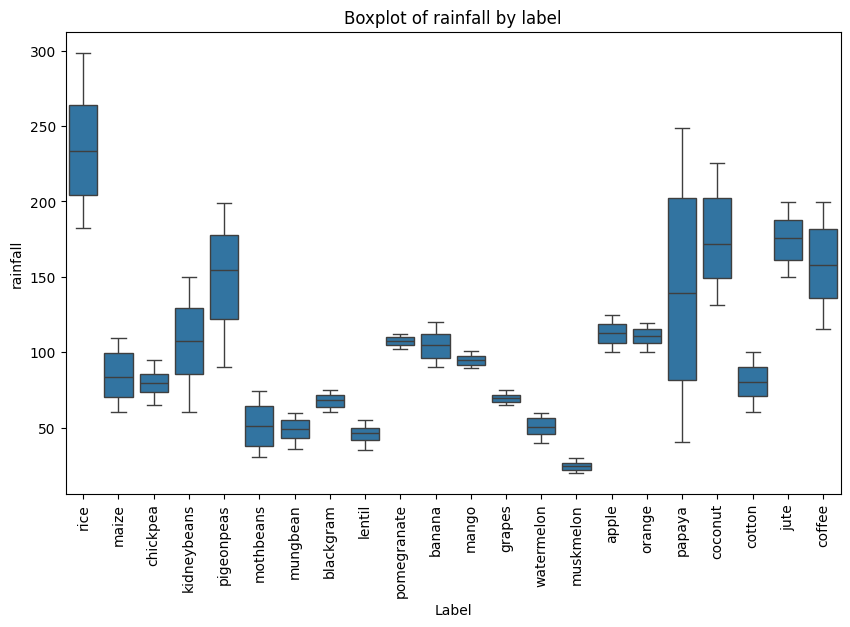

In [81]:
# Boxplot for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by label')
    plt.xlabel('Label')
    plt.ylabel(feature)
    plt.xticks(rotation=90)
    plt.show()

## 4.3 Korelasi

In [82]:
from sklearn.feature_selection import f_classif

In [83]:
# ANOVA
def anova_test(X, y):
    f_values, p_values = f_classif(X, y)
    return f_values, p_values

X = df[features]
y = df['label']

f_values, p_values = anova_test(X, y)

anova_results = pd.DataFrame({
    'Feature': features,
    'F-Value': f_values,
    'P-Value': p_values
})

anova_results = anova_results.sort_values(by='F-Value', ascending=False)
anova_results['P-Value'] = anova_results['P-Value'].apply(lambda p: f"{p:.2e}")

display(anova_results)



,Feature,F-Value,P-Value
2,K,27238.362067,0.00e+00
4,humidity,3103.708891,0.00e+00
1,P,1885.657859,0.00e+00
0,N,897.568186,0.00e+00
6,rainfall,605.527966,0.00e+00
3,temperature,102.186981,4.02e-305
5,ph,60.344034,6.49e-199


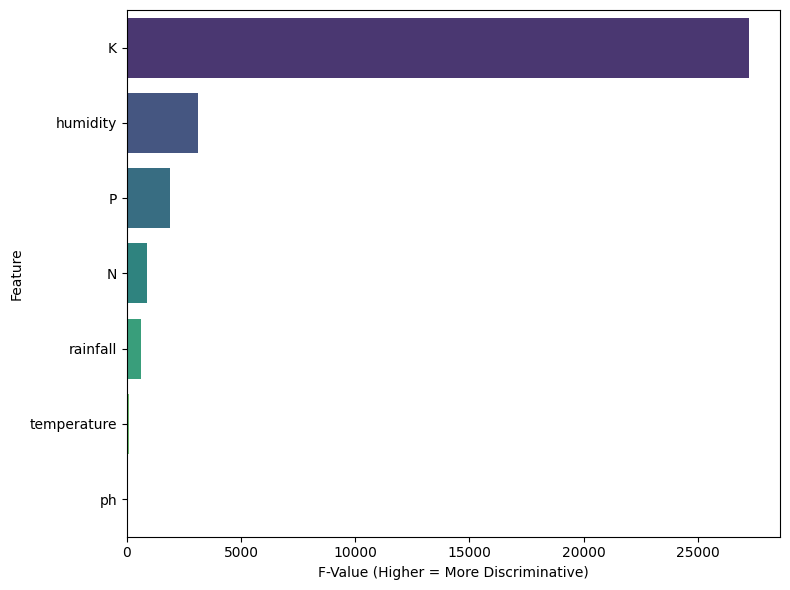

In [84]:
plt.figure(figsize=(8, 6))
sns.barplot(x='F-Value', y='Feature', data=anova_results, palette='viridis', hue='Feature', legend=False)

plt.xlabel('F-Value (Higher = More Discriminative)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Dari analisis yang telah dilakukan, tidak ditemukan missing value maupun duplikasi pada dataset ini.
Kelas target yaitu `label` juga tidak mengalami imbalance, sehingga tidak diperlukan penanganan lebih lanjut.
Model yang akan digunakan adalah `XGboost`, yang merupakan algoritma berbasis decision tree. Oleh karena itu, tidak diperlukan scaling pada fitur-fitur numerik. Sehingga langkah yang dilakukan pada tahap preprocessing adalah encoding pada kolom `label` yang merupakan variabel kategorikal.

In [85]:
y = df['label']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [86]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'apple': np.int64(0),
 'banana': np.int64(1),
 'blackgram': np.int64(2),
 'chickpea': np.int64(3),
 'coconut': np.int64(4),
 'coffee': np.int64(5),
 'cotton': np.int64(6),
 'grapes': np.int64(7),
 'jute': np.int64(8),
 'kidneybeans': np.int64(9),
 'lentil': np.int64(10),
 'maize': np.int64(11),
 'mango': np.int64(12),
 'mothbeans': np.int64(13),
 'mungbean': np.int64(14),
 'muskmelon': np.int64(15),
 'orange': np.int64(16),
 'papaya': np.int64(17),
 'pigeonpeas': np.int64(18),
 'pomegranate': np.int64(19),
 'rice': np.int64(20),
 'watermelon': np.int64(21)}

In [87]:
df_cleaned = df.copy()
df_cleaned['label_encoded'] = y_encoded
df_cleaned.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


In [88]:

df_cleaned.to_csv('crop_data_cleaned.csv', index=False)